In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Hides the pink warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
def data_formatter(path, column, aug_type):
    
    with open(path, 'rb') as f:
        df = pd.read_pickle(f)
     
    
    if column == 'shifts':
        df['shifts'] = list(range(1,23))
    
    elif column == 'pixels_lost':
        if aug_type == 'Linear':
            df['pixels_lost'] = pd.Series(list(range(1,23))) * 28
        elif aug_type == 'Diagonal' or aug_type == 'Combined':
            df['pixels_lost'] = pd.Series(list(range(1, 23))) * 28 * 2

    elif column == 'percentage_lost':
        if aug_type == 'Linear':
            pixels_lost = pd.Series(list(range(1,23))) * 28
        elif aug_type == 'Diagonal' or aug_type == 'Combined':
            pixels_lost = pd.Series(list(range(1,23))) * 28 * 2
            
        df['percentage_lost'] = round((pixels_lost/784), 3)
        
    df = pd.melt(df, id_vars = [column],
                value_vars = list('12345'),
                value_name = 'accuracy')
    
    df.drop('variable', axis = 1, inplace = True)
    
    df['aug_type'] = [aug_type] * len(df)

    return df

In [11]:
def visualizer_function(linear_file, diagonal_file, combined_file, column):
    
    linear_data = data_formatter(linear_file, column, 'Linear')
    diagonal_data = data_formatter(diagonal_file, column, 'Diagonal')
    combined_data = data_formatter(combined_file, column, 'Combined')
    
    data = pd.concat([linear_data, diagonal_data, combined_data])
    
    g = sns.catplot(x = column, y = 'accuracy', 
                    hue= 'aug_type', data = data, 
                    kind='box', height = 9)
    
    
    g.set_xticklabels(rotation=45)
    plt.show()

## Le-Net 5 Visualizations

In [12]:
linear_pkl = 'results/linear_non_augmented_test/performance_linear_non_augmented_test.pkl'
diagonal_pkl = 'results/diagonal_non_augmented_test/performance_diagonal_non_augmented_test.pkl'
combined_pkl = 'results/combined_non_augmented_test/performance_combined_non_augmented_test.pkl'

### Shifts

In [13]:
visualizer_function(linear_pkl, diagonal_pkl, combined_pkl, 'shifts')

TypeError: expected str, bytes or os.PathLike object, not _io.BufferedReader

### Maximum image pixel loss

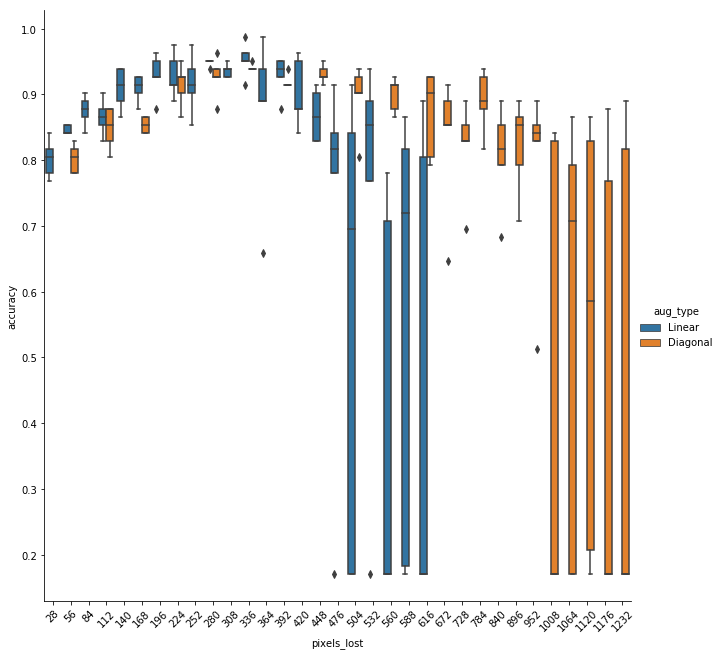

In [31]:
visualizer_function(linear_pkl, diagonal_pkl, 'pixels_lost')

### Maximum % of pixels losed

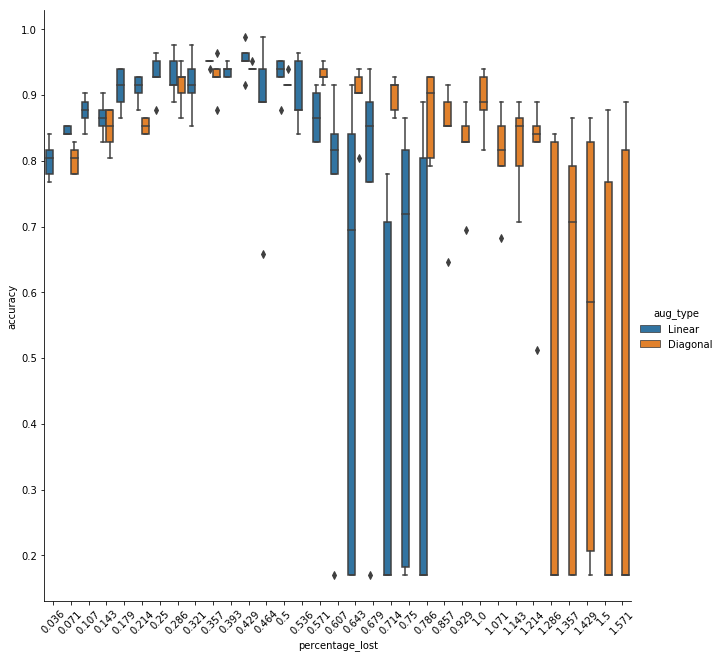

In [32]:
visualizer_function(linear_pkl, diagonal_pkl, 'percentage_lost')

## Support Vector Machine

In [9]:
def visualizer_function(linear_file, diagonal_file, combined_file, column):
    
    linear_data = data_formatter(linear_file, column, 'Linear')
    diagonal_data = data_formatter(diagonal_file, column, 'Diagonal')
    combined_data = data_formatter(combined_file, column, 'Combined')
    
    data = pd.concat([linear_data, diagonal_data, combined_data])
    
    g = sns.catplot(x = column, y = 'accuracy', 
                    hue= 'aug_type', data = data, 
                    kind='point', height = 8)
    
    g.set_xticklabels(rotation=45)
    plt.show()

In [10]:
svm_linear_pkl = 'results/svm_linear_non_augmented_test/svm_performance_linear_non_augmented_test.pkl'
svm_diagonal_pkl = 'results/svm_diagonal_non_augmented_test/svm_performance_diagonal_non_augmented_test.pkl'
svm_combined_pkl = 'results/svm_combined_non_augmented_test/svm_performance_combined_non_augmented_test.pkl'

### Shifts

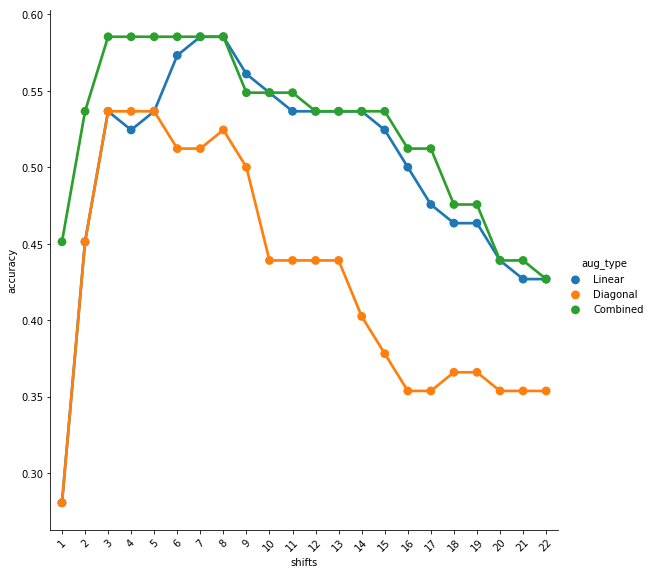

In [11]:
visualizer_function(svm_linear_pkl, svm_diagonal_pkl, svm_combined_pkl, 'shifts')

### Maximum image pixel loss

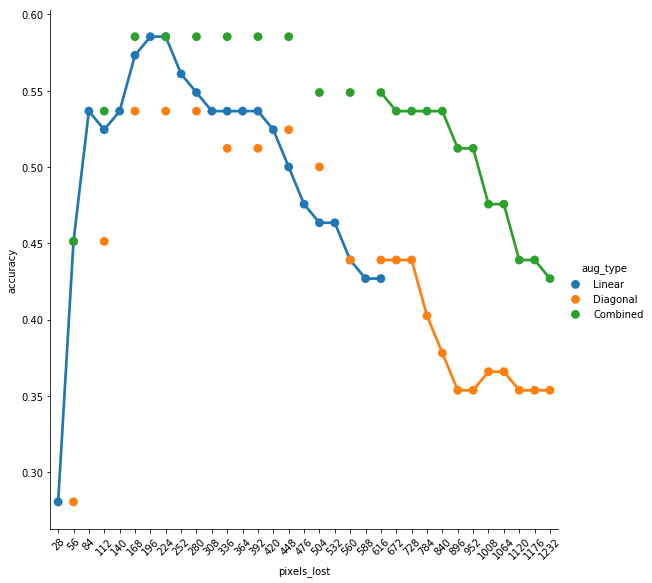

In [12]:
visualizer_function(svm_linear_pkl, svm_diagonal_pkl, svm_combined_pkl, 'pixels_lost')

### Maximum % of pixels losed

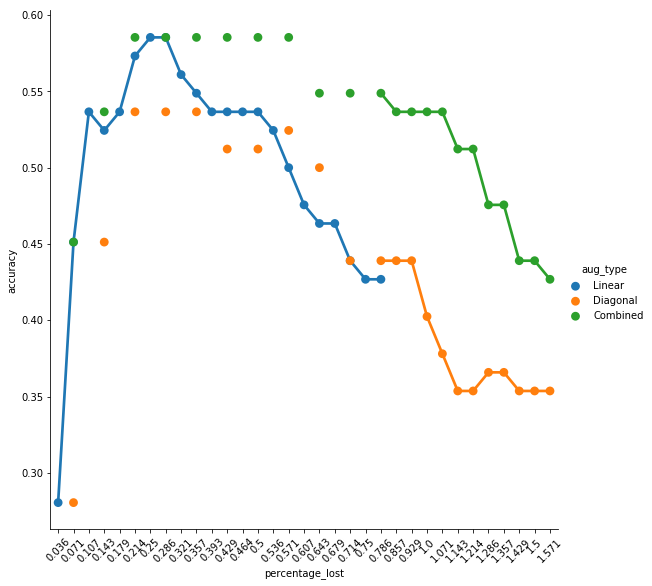

In [13]:
visualizer_function(svm_linear_pkl, svm_diagonal_pkl, svm_combined_pkl, 'percentage_lost')